# MA124 Maths by Computer: Assignment 3 
## Part B: Geometric Brownian Motion

Student number: 2103654

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

We consider numerical simulations of the stochastic differential equation for Geometric Brownian Motion given by 

$$
\dot S(t) = \mu S(t) + \sigma S(t) \xi(t)
$$

We consider the following parameter values:

growth rate, $\mu =0.05$

volatility, $\sigma=0.2$

$t_f = 5$, corresponding to 5 years

and 
initial stock price to be $S_0 = 100$

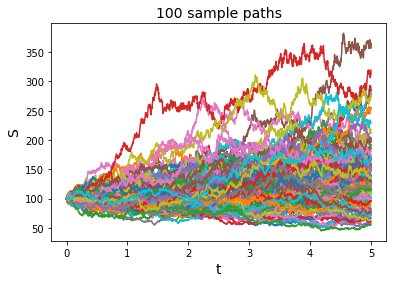

In [2]:
# Problem setup
# Set model
def SDE_GBM(S0, tf, mu, sigma, Npaths): 
    Nsteps = 365*tf
    t, dt = np.linspace(0,tf,Nsteps+1,retstep=True)
    S = np.zeros((Nsteps+1,Npaths))
    root_dt = np.sqrt(dt)

    S[0,:] = S0;
    for n in range(Nsteps):
        F_of_S = S[n,:]
        S[n+1,:] = S[n,:] + dt * F_of_S*mu +  sigma *S[n,:]* root_dt * np.random.randn(Npaths)
    return t, S

# plugging in our initial conditions into our function
t,S=SDE_GBM(100,5,0.05,0.2,100)

#plotting 100 sample paths
plt.plot(t,S)
plt.xlabel("t", fontsize=14)
plt.ylabel("S", fontsize=14)
plt.title("100 sample paths", fontsize=14)
plt.show()

The plot above shows the wide variety of possible flucuations the value of a stock could go in. We see that it could triple in price at the end of 5 years (where S=300) or it could half in price (where S=50). Other possibilities fall somewhere in between, roughly speaking.

Now we consider 2000 paths. Here is a a plot showing the mean +/- standard deviation for the 2000 paths as a function of time


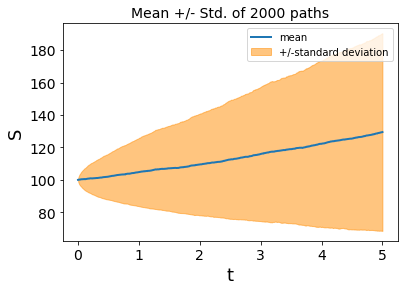

In [3]:
#now call the function with 2000 sample paths
t1,S1=SDE_GBM(100,5,0.05,0.2,2000)

print("Now we consider 2000 paths. Here is a a plot showing the mean +/- standard deviation for the 2000 paths as a function of time")
# Pretty plot using fill_between 
# shows the mean +/- standard deviation as function of time.

# Compute the mean and standard deviation as function of time
S_mean = np.mean(S1,1)
S_std = np.std(S1,1)

# Plot shaded region between S_mean - S_std and S_mean + S_std 
plt.fill_between(t1, 
                 S_mean - S_std, 
                 S_mean + S_std, 
                 alpha=0.5, color="darkorange",label="+/-standard deviation")

# Plot the mean itself
plt.plot(t1,S_mean, linewidth=2, label="mean")

# labels
plt.xlabel("t", fontsize=18)
plt.ylabel("S", fontsize=18)
plt.title("Mean +/- Std. of 2000 paths", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

Now we plot histograms at 3 different times showing the distribution of the SDE.

After 1 year (365 days), the mean of S is  104.81353695645531
and the standard deviation of S is 21.073928906539262 

After 3 years (1095 days) the mean of S is 115.93033901743848
and standard deviation of S is 41.35743153116695 

The mean of S at the final time (after 5 years) is 129.4567913490055
The standard deviation of S is 60.94141637205241 



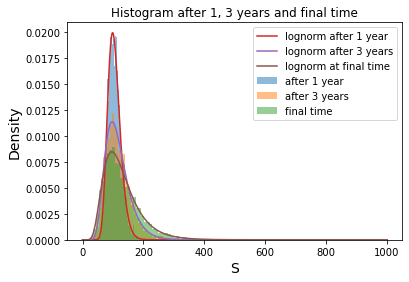

In [4]:
#plot histogram at 3 different times
plt.hist(S1[365,:], bins = 51, density=True, alpha=0.5,label="after 1 year")
plt.hist(S1[1095,:], bins = 51, density=True, alpha=0.5,label="after 3 years")
plt.hist(S1[-1,:], bins = 51, density=True, alpha=0.5,label="final time")

#printing mean and s.d.
print("After 1 year (365 days), the mean of S is ", np.mean(S1[365,:]))
print("and the standard deviation of S is", np.std(S1[365,:]),"\n")

print("After 3 years (1095 days) the mean of S is", np.mean(S1[1095,:]))
print("and standard deviation of S is", np.std(S1[1095,:]),"\n")

print("The mean of S at the final time (after 5 years) is", np.mean(S1[-1,:]))
print("The standard deviation of S is", np.std(S1[-1,:]),"\n")

plt.xlabel("S", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.title("histogram for stock growth", fontsize=14)

## CHALLENGE SECTION
# I have found the distribution to be lognorm
x=np.linspace(0,1000,1001)
s,loc,scale=lognorm.fit(S1[365,:],floc=0)
plt.plot(lognorm.pdf(x,s,loc,scale),label="lognorm after 1 year")

s,loc,scale=lognorm.fit(S1[1095,:],floc=0)
plt.plot(lognorm.pdf(x,s,loc,scale),label="lognorm after 3 years")

s,loc,scale=lognorm.fit(S1[-1,:],floc=0)
plt.plot(lognorm.pdf(x,s,loc,scale),label="lognorm at final time")

plt.legend()
plt.xlabel("S")
plt.ylabel("Density")
plt.title("Histogram after 1, 3 years and final time")

plt.show()

The peak density falls over time; as we consider more data points, it makes sense this is the case. We also see that the mean and standard deviation increase over time. Possibly this could be because over a larger period of time, there is a greater chance for flucuations.

### Challenge comment:

The mean of the distribution depends on time because of compounding effects- e.g. price decreases reduce the base meaning after an initial loss, you have less to lose next time. Losing 10% of 100 (i.e. 10) is greater than losing 10% of 90 (i.e. 9).

The median of the distribution is less than the mean because the lognormal distribution has a sharp drop off to the left of mean and a highly skewed "long tail" to the right of the mean. Therefore, the high values of S given by the points to the right of the mean skew the mean to be larger. The median instead looks at the 'middle' point so is not affected by this long tail skew.